In [62]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc


# Reading the Dataset

In [63]:
dataset = pd.read_csv('Sentiment.csv')
dataset.head()


,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [64]:
dataset = dataset[['text', 'sentiment']]
dataset = dataset[dataset['sentiment'] != 'Neutral']


In [65]:
dataset

,text,sentiment
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive
6,RT @warriorwoman91: I liked her and was happy ...,Negative
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


In [22]:
dataset = dataset[dataset['sentiment']!= 'Neutral']

In [23]:
dataset

,text,sentiment
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive
6,RT @warriorwoman91: I liked her and was happy ...,Negative
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


# Exploratory Data Analysis

# Columns/features in data

In [24]:
dataset.columns

Index(['text', 'sentiment'], dtype='object')

In [25]:
print('length of data is', len(dataset))

length of data is 10729


In [26]:
dataset. shape

(10729, 2)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729 entries, 1 to 13870
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       10729 non-null  object
 1   sentiment  10729 non-null  object
dtypes: object(2)
memory usage: 251.5+ KB


In [28]:
dataset.dtypes

text         object
sentiment    object
dtype: object

In [29]:
np.sum(dataset.isnull().any(axis=1))

0

In [30]:
print('Count of columns in the data is:  ', len(dataset.columns))
print('Count of rows in the data is:  ', len(dataset))

Count of columns in the data is:   2
Count of rows in the data is:   10729


# Data Preprocessing

In [8]:
train, test = train_test_split(dataset, test_size=0.1)


In [31]:
train

,text,sentiment
5094,RT @hilderestad: Republican strategist @FrankL...,Positive
3552,Where is a zombie Ronald Reagan when you need ...,Negative
5172,RT @darth: so apparently the candidates are ar...,Negative
8728,RT @Desdemona4U: It was unfathomable that @meg...,Negative
3898,"@GuardianUS yes, thank you! #GOPDebate",Negative
...,...,...
3445,RT @MolonLabe1776us: Retweet if you think @Hil...,Positive
3289,"Watching the #GOPdebate (finally), can't help ...",Negative
11931,RT @mozgovaya: 10 men on stage discussing one ...,Negative
13369,When Donald Trump calls out Rosie ODonald 👌🏼😂 ...,Positive


In [32]:
test

,text,sentiment
12940,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,Negative
11546,RT @SalMasekela: Is Kasich aware that he's mak...,Positive
3922,"Dear Internet, can we start #trumping as a thi...",Negative
8959,RT @RWSurferGirl: We the American people pick ...,Negative
714,@RandPaul got his clock cleaned last night. By...,Negative
...,...,...
10641,RT @RWSurferGirl: It is very disappointing tha...,Negative
11175,"RT @SupermanHotMale: Dear fox news moderator, ...",Negative
12085,My take on all of this stuff on abortion:\n\nh...,Negative
10399,RT @DanMoore755: The republican candidates are...,Negative


In [33]:
pattern = "(#\w+)|(RT\s@\w+:)|(http.*)|(@\w+)"
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [34]:
def clean_text(data):
    tweets = []
    sentiments = []
    for index, row in data.iterrows():
        sentence = re.sub(pattern, '', row.text)
        words = [e.lower() for e in sentence.split()]
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = ' '.join(words)
        tweets.append(words)
        sentiments.append(row.sentiment)
    return tweets, sentiments

In [35]:
train_tweets, train_sentiments = clean_text(train)

In [36]:
final_data = {'tweets':train_tweets,'sentiments':train_sentiments}

In [37]:
processed_data = pd.DataFrame(final_data)
processed_data

,tweets,sentiments
0,republican strategist 's focus group ended dec...,Positive
1,zombie ronald reagan need him?,Negative
2,apparently candidate arriving debate site,Negative
3,unfathomable would ask wasserman-schultz postm...,Negative
4,"yes, thank you!",Negative
...,...,...
9651,retweet think prison. h…,Positive
9652,"watching (finally), can't help think american ...",Negative
9653,10 men stage discussing one woman.,Negative
9654,donald trump call rosie odonald 👌🏼😂,Positive


In [38]:
# Split the data
X_train, X_test, sentiment_train, sentiment_test = train_test_split(
    processed_data['tweets'], processed_data['sentiments'], test_size=0.2, random_state=42)

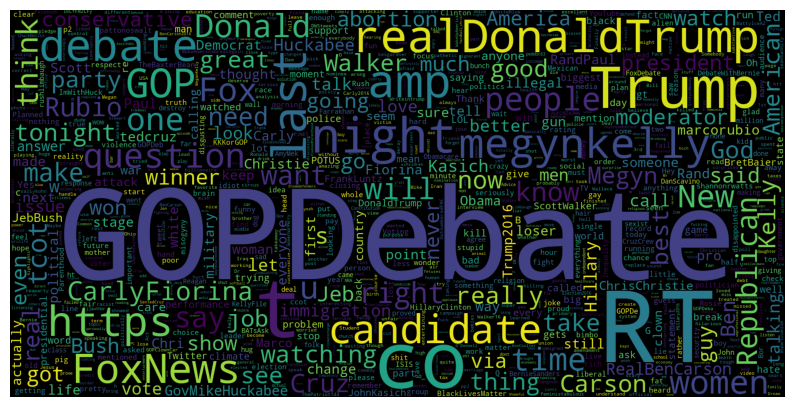

In [43]:
#plot a negative weets
X = dataset.text
y = dataset.sentiment
dataset_neg = dataset['text'][:3000]

plt.figure(figsize=(10, 10))

wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(dataset_neg))

plt.imshow(wc)
plt.axis("off")  
plt.show()

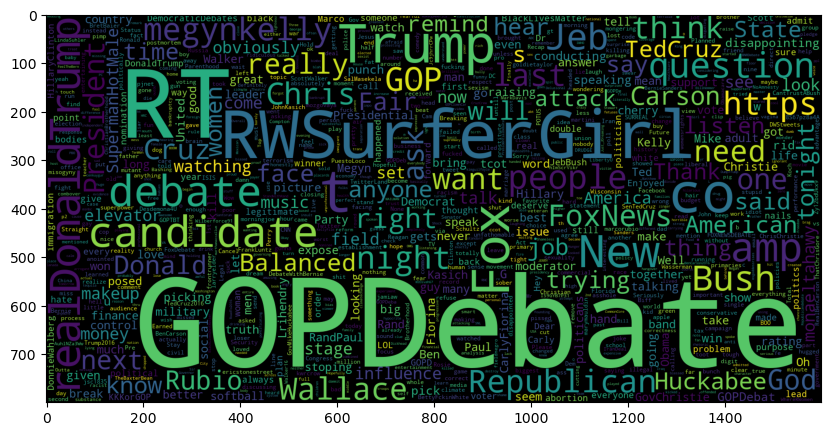

In [46]:
#Plot a positive Tweets
data_pos = dataset['text'][3000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (10,10))
plt.imshow(wc)


# Data Visualization

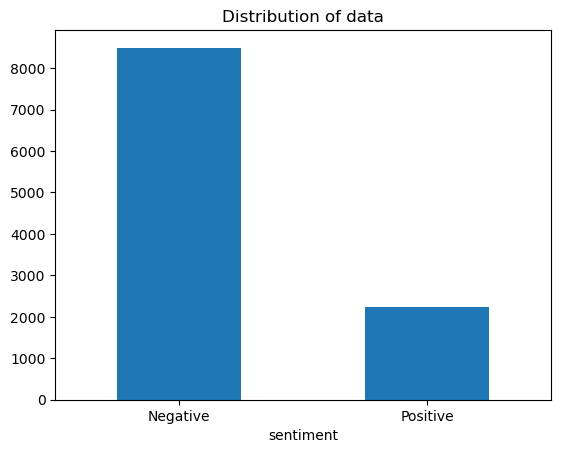

In [51]:
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data', legend=False)

# Set the tick locations and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)

# Your remaining code
text, sentiment = list(dataset['sentiment']), list(dataset['text'])

# Show the plot
plt.show()


<AxesSubplot:xlabel='sentiment', ylabel='count'>

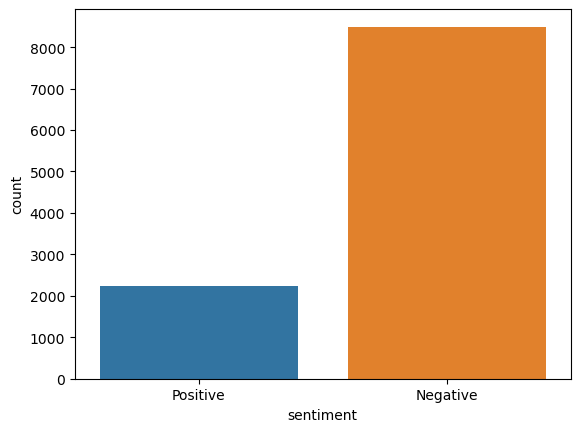

In [52]:
sns.countplot(x='sentiment', data=dataset)

# Creating the TF-IDF Vectorizer:

In [53]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(train_tweets)
y_train = train_sentiments


# Training Naive Bayes Model:

In [54]:
naive_bayes_model = BernoulliNB()
naive_bayes_model.fit(X_train_vectorized, y_train)


BernoulliNB()

# Training SVM Model:

In [55]:
svm_model = LinearSVC()
svm_model.fit(X_train_vectorized, y_train)


LinearSVC()

# Making Predictions on Test Data:

In [56]:
test_tweets, test_sentiments = clean_text(test)
X_test_vectorized = vectorizer.transform(test_tweets)

naive_bayes_predictions = naive_bayes_model.predict(X_test_vectorized)
svm_predictions = svm_model.predict(X_test_vectorized)


# Evaluating Naive Bayes:

In [57]:
naive_bayes_accuracy = accuracy_score(test_sentiments, naive_bayes_predictions)
naive_bayes_report = classification_report(test_sentiments, naive_bayes_predictions)


# Evaluating SVM:

In [58]:
svm_accuracy = accuracy_score(test_sentiments, svm_predictions)
svm_report = classification_report(test_sentiments, svm_predictions)


# Comparing Results:

In [59]:
print("Naive Bayes Results:")
print(f"Accuracy: {naive_bayes_accuracy}")
print(f"Classification Report:\n{naive_bayes_report}")

print("\nSupport Vector Machine (SVM) Results:")
print(f"Accuracy: {svm_accuracy}")
print(f"Classification Report:\n{svm_report}")


Naive Bayes Results:
Accuracy: 0.8285181733457595
Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.94      0.90       847
    Positive       0.65      0.40      0.50       226

    accuracy                           0.83      1073
   macro avg       0.75      0.67      0.70      1073
weighted avg       0.81      0.83      0.81      1073


Support Vector Machine (SVM) Results:
Accuracy: 0.8527493010251631
Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.94      0.91       847
    Positive       0.69      0.54      0.61       226

    accuracy                           0.85      1073
   macro avg       0.79      0.74      0.76      1073
weighted avg       0.84      0.85      0.85      1073



# Making Predictions on New Data:

In [60]:
new_data = ["This is a positive tweet.", "I didn't like the movie."]
new_data_vectorized = vectorizer.transform(new_data)

new_data_naive_bayes_predictions = naive_bayes_model.predict(new_data_vectorized)
print(f"Naive Bayes Predictions for new data: {new_data_naive_bayes_predictions}")

new_data_svm_predictions = svm_model.predict(new_data_vectorized)
print(f"SVM Predictions for new data: {new_data_svm_predictions}")


Naive Bayes Predictions for new data: ['Negative' 'Negative']
SVM Predictions for new data: ['Negative' 'Negative']
